In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

In [78]:
original_df = pd.read_csv('/opt/ml/input/data/eval/output_maskgenderage.csv')
fc_df = pd.read_csv('/opt/ml/code/output/R18_FC_AGE.csv')
sc_df = pd.read_csv('/opt/ml/code/output/R18_SC_AGE.csv')
scfu_df = pd.read_csv('/opt/ml/code/output/R18_SCFU_AGE.csv')
IMG_DIR = Path('/opt/ml/input/data/eval/images')
original_df

,Unnamed: 0,ImageID,mask,gender,age
0,0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,2,0,1
1,1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,0,0,1
2,2,b549040c49190cedc41327748aeb197c1670f14d.jpg,2,0,1
3,3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,2,0,1
4,4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,2,0,0
...,...,...,...,...,...
12595,12595,d71d4570505d6af8f777690e63edfa8d85ea4476.jpg,0,0,2
12596,12596,6cf1300e8e218716728d5820c0bab553306c2cfd.jpg,0,1,1
12597,12597,8140edbba31c3a824e817e6d5fb95343199e2387.jpg,1,1,0
12598,12598,030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg,0,0,1


In [79]:
def get_label_verbosity(idx):
    ori = original_df.iloc[idx]['age']
    fc = fc_df.iloc[idx]['ageMod10']
    sc = sc_df.iloc[idx]['ageMod10']
    scd = scfu_df.iloc[idx]['ageMod10']
    
    res = f"{ori}\n{fc}\n{sc}\n{scd}"
    return res

def get_age(idx):
    mask = original_df.iloc[idx]['mask']
    gender = original_df.iloc[idx]['gender']
    
    result = original_df.iloc[idx]['age']
    fc = fc_df.iloc[idx]['ageMod10']
    sc = sc_df.iloc[idx]['ageMod10']
    scd = scfu_df.iloc[idx]['ageMod10']
    
    check = [fc, sc, scd]
    if fc == 5 and sc == 5 and scd == 4 and result == 1:
        result = 2
    if 6 in check:
        result = 2
    return mask * 6 + gender * 3 + result

[]

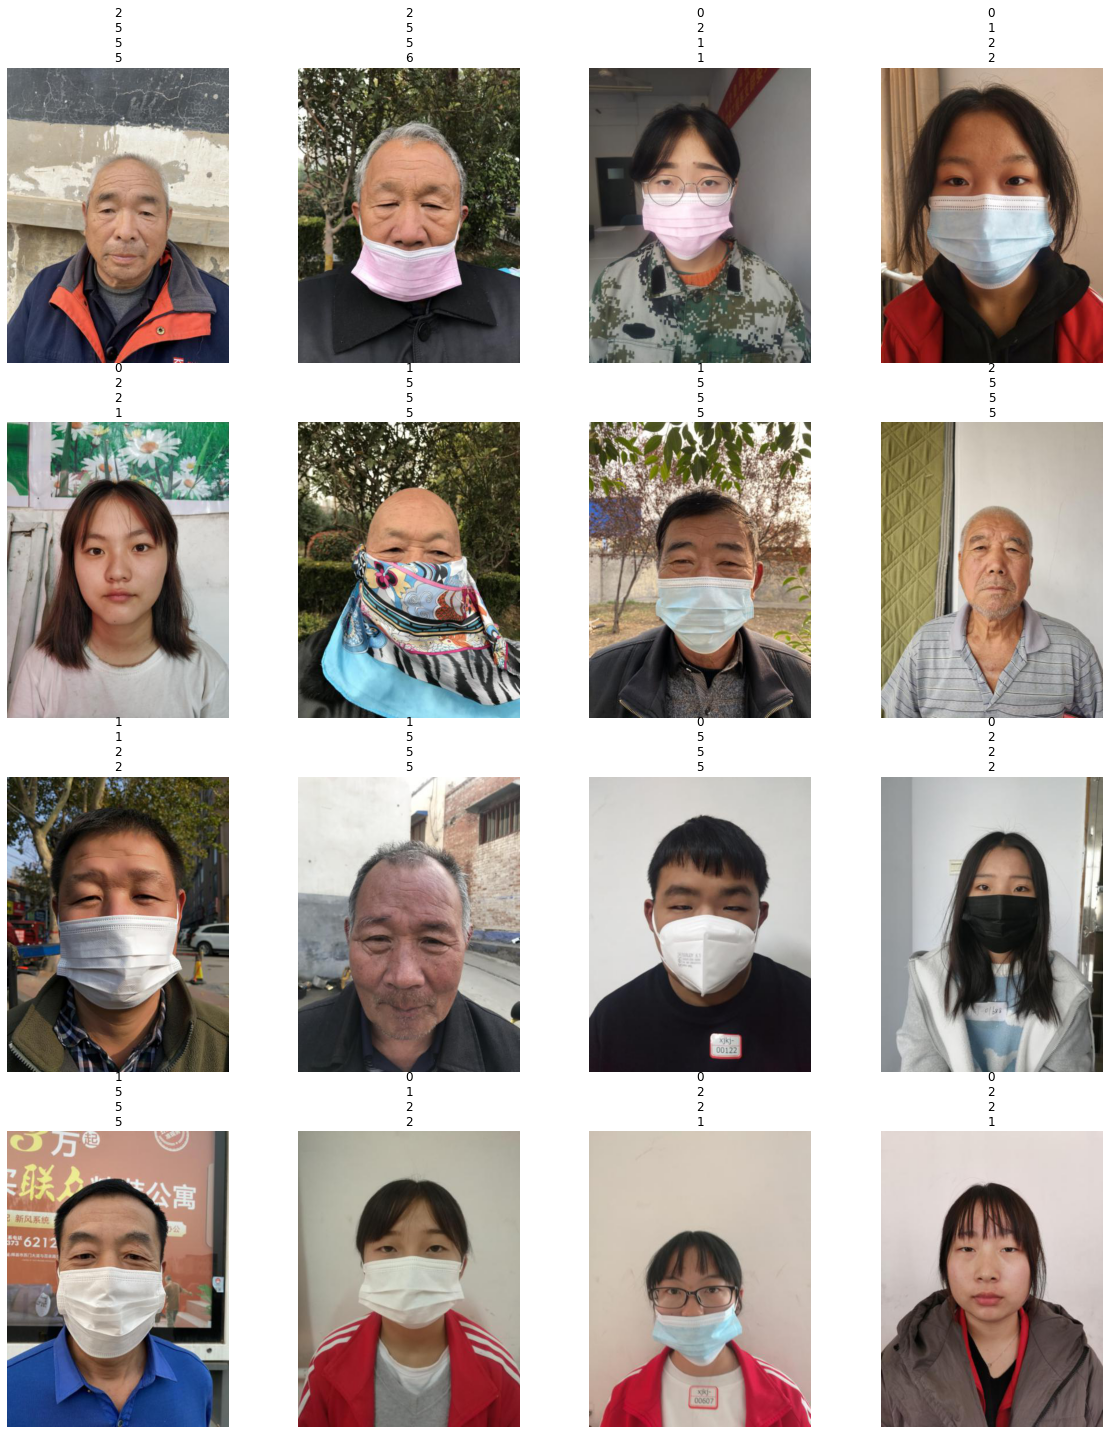

In [80]:
NUM_SHOW = 4
TOTAL = NUM_SHOW * NUM_SHOW

plt.figure(figsize=(20,25))

start_idx = np.random.randint(0,len(df) - TOTAL)
cnt = 1
for idx in range(start_idx, start_idx + TOTAL):
    img = Image.open(IMG_DIR / df.loc[idx, 'ImageID'])
    plt.subplot(NUM_SHOW, NUM_SHOW, cnt)
    plt.imshow(img)
    plt.title(get_label_verbosity(idx))
    plt.axis('off')
    cnt += 1
    
plt.plot()

In [66]:
df_out = pd.DataFrame(None, columns = ['ImageID', 'ans'])

In [67]:
for i in range(len(original_df)):
    img_id = original_df.iloc[i]['ImageID']
    ans = get_age(i)
    data = {
            'ImageID': img_id,
            'ans': ans
        }
    df_out = df_out.append(data, ignore_index=True)


In [68]:
df_out

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,13
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,2
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,14
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,13
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12
...,...,...
12595,d71d4570505d6af8f777690e63edfa8d85ea4476.jpg,2
12596,6cf1300e8e218716728d5820c0bab553306c2cfd.jpg,4
12597,8140edbba31c3a824e817e6d5fb95343199e2387.jpg,9
12598,030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg,1


In [69]:
out_path = '/opt/ml/input/data/eval/output(7909)_ageCombine2.csv'
df_out.to_csv(out_path, index=False)